In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
# prep for double exponential fits
def double_exp(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)
def triple_exp(x, a, b, c, d, e, f):
    return a * np.exp(b * x) + c * np.exp(d * x) + e * np.exp(f * x)

# Correlation Propagator

In [3]:
correlations = np.genfromtxt("correlation_to_equal_time.csv", delimiter=",")
average = correlations.mean(axis=1)
sem = stats.sem(correlations, axis=1)
average_to_max = average[0:np.argmax(average)]
sem_to_max = sem[0:np.argmax(average)]
# Adjust the following line for each system to make everything ns.
taus = np.arange(1,np.argmax(average)+1) 


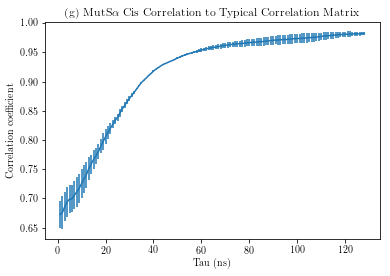

In [20]:
plt.errorbar(taus, average_to_max, sem_to_max)
plt.title(r'(g) MutS$\alpha$ Cis Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('Cis_prop_max_correlation_to_equaltime.png')

Bars are standard error

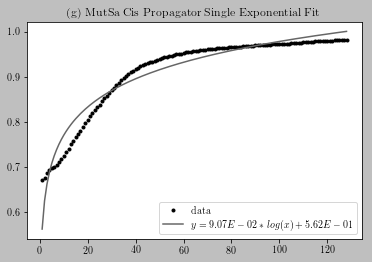

In [4]:
plt.style.use('grayscale')
fit = np.polyfit(np.log(taus), average_to_max, 1)
#y = 0.09065642*log(x) + 0.56204586
yhat = 0.09065642*np.log(taus) + 0.56204586
plt.plot(taus, average_to_max, '.', taus, yhat, '-')
plt.title("(g) MutSa Cis Propagator Single Exponential Fit")
plt.legend(['data', '$y = {0:1.2E}*log(x) + {1:1.2E}$'.format(fit[0], fit[1])])
plt.savefig('FIT_Cis_prop_max_correlation_to_equaltime.png')

$$y = 0.09065642*log(x) + 0.56204586$$

[ -4.15994705e-01  -3.07607759e-02   1.04967572e+00  -5.13930426e-04]


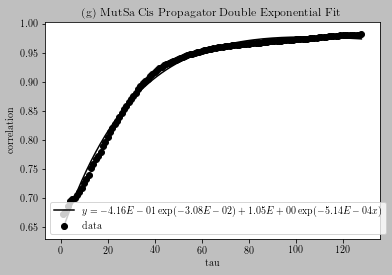

In [5]:
popt, pcov = curve_fit(double_exp,taus,average_to_max,p0=(1.18,-.26,0,0))
print(popt)
curvey = double_exp(taus,popt[0],popt[1], popt[2], popt[3]) # This is your y axis fit-line
plt.plot(taus, curvey, label="$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x)$".format(popt[0],popt[1], popt[2], popt[3]))
plt.scatter(taus,average_to_max, label='data')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.title('(g) MutSa Cis Propagator Double Exponential Fit')
plt.savefig('doubleFIT_Cis_prop_max_correlation_to_equaltime.png')

$$y = -4.15994705\times10^{-01} e^{-3.07607759\times10^{-02}x} + 1.04967572 e^{-5.13930426\times10^{-04}x}$$

[ -3.35031988e+01  -7.01544201e-03  -3.39164648e+03  -7.03690573e-03
   3.42581189e+03  -7.03283040e-03]


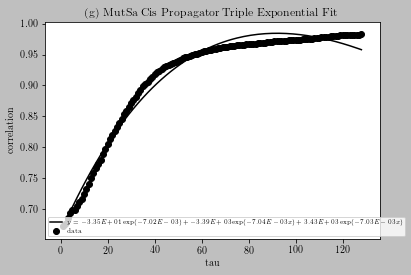

In [6]:
popt, pcov = curve_fit(triple_exp,taus,average_to_max,p0=(0.8,0.03,0,0,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(taus,popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(taus, curvey, label="$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x) + {4:1.2E} \exp({5:1.2E}x)$".format(
        popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]))
plt.scatter(taus,average_to_max, label='data')
plt.legend(loc='best', fontsize=6)
plt.xlabel('tau')
plt.ylabel('correlation')
plt.title('(g) MutSa Cis Propagator Triple Exponential Fit')
plt.savefig('tripleFIT_Cis_prop_max_correlation_to_equaltime.png')

$$y = -3.35031988\times10^{1} e^{-7.01544201\times10^{-03}x} + -3.39164648\times10^{3} e^{-7.03690573\times10^{-3}x} + 3.42581189\times10^{3} e^{-7.03283040\times10^{-3}}$$

# Time Lagged

In [7]:
TLcorrelations = np.genfromtxt("TLcorrelation_to_equal_time.csv", delimiter=",")
TLaverage = TLcorrelations.mean(axis=1)
TLsem = stats.sem(TLcorrelations, axis=1)
# Adjust the following line for each system to make everything ns.
TLtaus = np.arange(1,len(TLaverage)+1) 

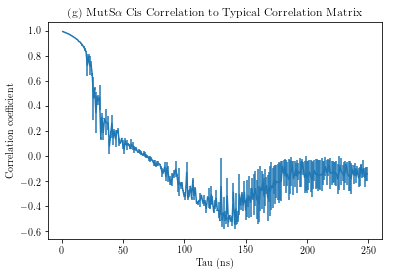

In [22]:
plt.errorbar(TLtaus, TLaverage, TLsem)

plt.title(r'(g) MutS$\alpha$ Cis Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('Cis_TL_correlation_to_equaltime.png')

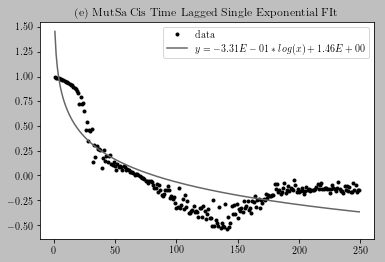

In [8]:
fit = np.polyfit(np.log(TLtaus), TLaverage, 1)
#y = -0.33071724*log(x) + 1.45622039
yhat = -0.33071724*np.log(TLtaus) + 1.45622039
plt.style.use('grayscale')
plt.plot(TLtaus, TLaverage, '.', TLtaus, yhat, '-')
plt.legend(['data', '$y = {0:1.2E}*log(x) + {1:1.2E}$'.format(fit[0], fit[1])])
plt.title('(e) MutSa Cis Time Lagged Single Exponential FIt')
plt.savefig('FIT_Cis_TL_correlation_to_equaltime.png')

$$y = -0.33071724*log(x) + 1.45622039$$

[  3.47452885e+02  -1.31698372e-02  -3.46165742e+02  -1.31073386e-02]


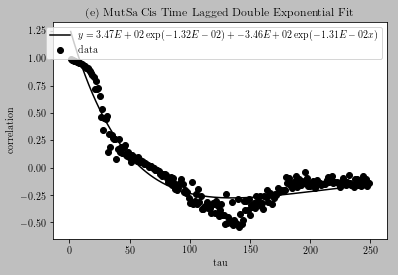

In [9]:
popt, pcov = curve_fit(double_exp,TLtaus,TLaverage,p0=(1.45622039,-0.3307172,0,1),maxfev=10000)
print(popt)
curvey = double_exp(TLtaus,popt[0],popt[1],popt[2],popt[3]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, label="$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x)$".format(popt[0],popt[1], popt[2], popt[3]))
plt.scatter(TLtaus,TLaverage, label='data')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.title('(e) MutSa Cis Time Lagged Double Exponential Fit')
plt.savefig('doubleFIT_Cis_TL_correlation_to_equaltime.png')

$$y = 3.47452885\times10^{2} e^{-1.31698372\times10^{-02}x} + -3.46165742\times10^{2} e^{-1.31073386\times10^{-02}x}$$

[  1.05031454e+03  -5.92552307e-03  -1.54446696e+03  -5.69931248e-03
   4.95355321e+02  -5.26810610e-03]


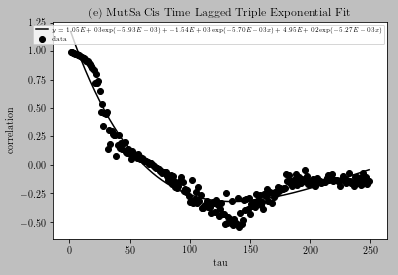

In [10]:
popt, pcov = curve_fit(triple_exp,TLtaus,TLaverage,p0=(3.5,-0.013,-3.5,-.013,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(TLtaus,popt[0],popt[1],popt[2],popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, label="$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x) + {4:1.2E} \exp({5:1.2E}x)$".format(
        popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]))
plt.scatter(TLtaus, TLaverage, label='data')
plt.legend(loc='best', fontsize=6)
plt.xlabel('tau')
plt.ylabel('correlation')
plt.title('(e) MutSa Cis Time Lagged Triple Exponential Fit')
plt.savefig('tripleFIT_Cis_TL_correlation_to_equaltime.png')

$$y = 1.0503145\times10^{3} e^{-5.92552307\times10^{-03}x} + -1.54446696\times10^{3} e^{-5.69931248\times10^{-3}x} + 4.9535532\times10^{2} e^{-5.26810610\times10^{-3}}$$